## Ensemble Forecasts

This notebook demonstrates basic ensemble forecasts using `get_solar_forecast_ensemble_subset` and `get_solar_forecast_ensemble`.

In [ ]:
import matplotlib.pyplot as plt
from hefty.pv_model import model_pv_power
from hefty.solar import get_solar_forecast_ensemble_subset, get_solar_forecast_ensemble
import pandas as pd

Define input variables.

The function gets an irradiance forecast using the same approach for IFS in `get_solar_forecast_fast()`, but for multiple ensemble members (up to 50). For temperature, it only gets the ensemble mean, and for wind speed, it just fills in 2 m/s to speed things up a bit. 

In [2]:
init_date = pd.to_datetime('2025-09-05 12:00')
latitude = [33.5, 32, 33]
longitude = [-88.5, -89, -91]
num_members = 4 # up to 50 for IFS
run_length = 48 # needs to be multiple of 6
lead_time_to_start = 18 # needs to be a multiple of 6
model = 'ifs'
attempts = 4

Run the function:

In [3]:
resource = get_solar_forecast_ensemble_subset(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model, attempts, num_members)

👨🏻‍🏭 Created directory: [C:\Users\willh\data\ifs\20250905]


And plot the results:

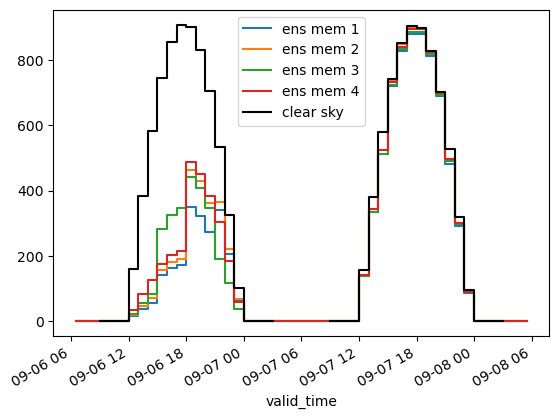

In [4]:
member_list = resource['member'].unique()
point = 0
for member in member_list:
    resource[(resource['member'] == member) & (resource['point'] == point)]['ghi'].plot(label=('ens mem ' + str(member)), drawstyle='steps-mid')
resource[(resource['member'] == member_list[0]) & (resource['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.legend()
plt.show()

You could then loop through `member` and `point` (plant) values and model power for each plant/ensemble member combination. Summing power for all plants within each member would give an ensemble aggregate forecast. 

Now, let's get all 50 members from IFS:

In [5]:
resource_all = get_solar_forecast_ensemble(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model, attempts)

That ran much faster because FastHerbie seems to work much better when downloading .grib2 files before processing them, which the `get_solar_forecast_ensemble` function does.

*Note that the downloaded files remain and take up about 60 MB per NWP valid time.*

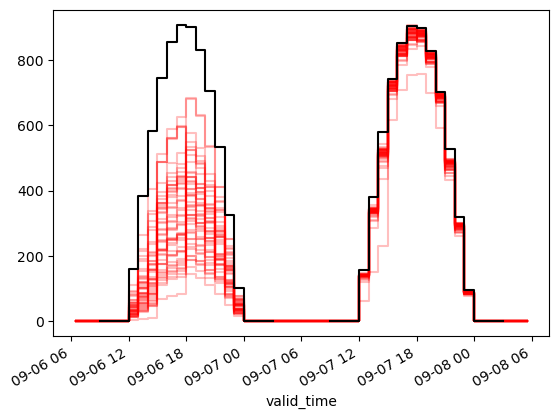

In [6]:
resource = resource_all.copy()
member_list = resource['member'].unique()
point = 0
for member in member_list:
    resource[(resource['member'] == member) & (resource['point'] == point)]['ghi'].plot(drawstyle='steps-mid', color='red', alpha=0.25)
resource[(resource['member'] == member_list[0]) & (resource['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.show()

Now let's look at the ECMWF AIFS. Note that the AIFS Ensemble only became available in July, 2025. 

In [7]:
resource_aifs = get_solar_forecast_ensemble(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model='aifs', attempts=attempts)

👨🏻‍🏭 Created directory: [C:\Users\willh\data\aifs\20250905]


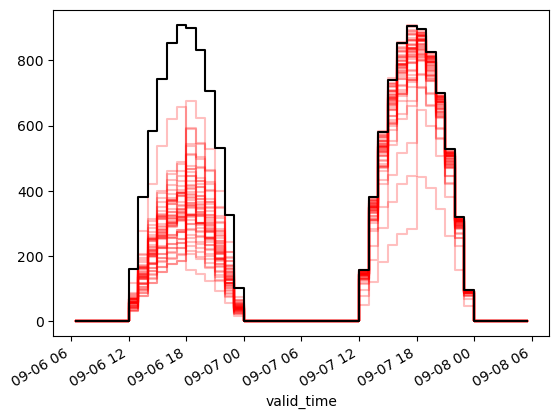

In [8]:
resource = resource_aifs.copy()
member_list = resource['member'].unique()
point = 0
for member in member_list:
    resource[(resource['member'] == member) & (resource['point'] == point)]['ghi'].plot(drawstyle='steps-mid', color='red', alpha=0.25)
resource[(resource['member'] == member_list[0]) & (resource['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.show()

And NOAA GEFS:

In [9]:
resource_gefs = get_solar_forecast_ensemble(
    latitude, longitude, init_date, run_length,
    lead_time_to_start, model='gefs', attempts=attempts)

Exception has occured : 503 Server Error: Slow Down for url: https://noaa-gefs-pds.s3.amazonaws.com/gefs.20250905/12/atmos/pgrb2sp25/gep10.t12z.pgrb2s.0p25.f039.idx
Exception has occured : 503 Server Error: Slow Down for url: https://noaa-gefs-pds.s3.amazonaws.com/gefs.20250905/12/atmos/pgrb2sp25/gep11.t12z.pgrb2s.0p25.f066.idx
Exception has occured : 503 Server Error: Slow Down for url: https://noaa-gefs-pds.s3.amazonaws.com/gefs.20250905/12/atmos/pgrb2sp25/gep11.t12z.pgrb2s.0p25.f063.idx


attempt 1 failed, pause for 1 min


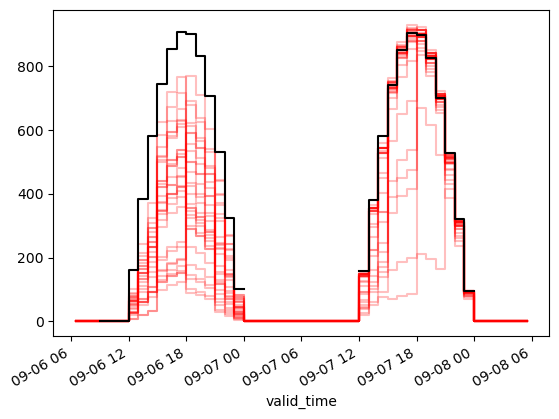

In [10]:
resource = resource_gefs.copy()
member_list = resource['member'].unique()
point = 0
for member in member_list:
    resource[(resource['member'] == member) & (resource['point'] == point)]['ghi'].plot(drawstyle='steps-mid', color='red', alpha=0.25)
resource[(resource['member'] == member_list[0]) & (resource['point'] == point)]['ghi_clear'].plot(label='clear sky', color='black', drawstyle='steps-mid')
plt.show()

_This document/data/output/Results is/are based on data and products of the European Centre for Medium-Range Weather Forecasts (ECMWF), licensed under CC BY 4.0. © 2025 European Centre for Medium-Range Weather Forecasts (ECMWF), www.ecmwf.int. This data is published under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0). To view a copy of this licence, visit https://creativecommons.org/licenses/by-nc-sa/4.0/. ECMWF does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use._

_ECMWF Data have been modified using the functions included in the hefty Python package (e.g., interpolation to hourly values)._